## Exploring missing values and recoding fuzzy values in dataset Q1

In [1]:
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    with open('../config.yaml') as file:
        config = yaml.safe_load(file)
except:
    print("Yaml file not found.")

In [3]:
# Load dataset q1

q1_df = pd.read_csv(config['input_data']['q1_dataset'])
q1_df.head()

,username,country,country_code,question_no,uid,year,answer,value_na,value
0,ALB22uFF4m,Albania,ALB,1,q1c1_apjufc,2000,Mixed system [0.5],0.5,0.5
1,ALB22uFF4m,Albania,ALB,1,q1c1_apjufc,2001,Mixed system [0.5],0.5,0.5
2,ALB22uFF4m,Albania,ALB,1,q1c1_apjufc,2002,Mixed system [0.5],0.5,0.5
3,ALB22uFF4m,Albania,ALB,1,q1c1_apjufc,2003,Mixed system [0.5],0.5,0.5
4,ALB22uFF4m,Albania,ALB,1,q1c1_apjufc,2004,Mixed system [0.5],0.5,0.5


In [4]:
# Check for missing values (in percentage) 

(q1_df.isna().mean().sort_values(ascending=False)*100).head()

value_na        7.992592
value           7.992592
answer          3.534965
country_code    0.791557
country         0.791557
dtype: float64

#### Clean dataset

In [5]:
import sys
sys.path.append('../py_files')
from functions import cleaning_judicial_autonomy_data

In [15]:
q1_cleaned = cleaning_judicial_autonomy_data(q1_df)
#q1_cleaned

In [7]:
# Decide to drop all questions with more than 20% values missing

columns_nan_percentage = q1_cleaned.isna().mean()*100
columns_nan_20_percent = columns_nan_percentage[columns_nan_percentage > 20].index
columns_nan_20_percent

Index([], dtype='object')

#### Check missing values per column(s)

In [19]:
# Check datatypes and missing values

q1_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 46 to 1103
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   username           920 non-null    object 
 1   country            920 non-null    object 
 2   country_code       920 non-null    object 
 3   year               920 non-null    int64  
 4   q1c1_apjuac        902 non-null    float64
 5   q1c1_apjufc        897 non-null    float64
 6   q1c1_apjuhc        920 non-null    float64
 7   q1c1_appealac      902 non-null    float64
 8   q1c1_appealfc      920 non-null    float64
 9   q1c1_appealhc      920 non-null    float64
 10  q1c1_appresidac    902 non-null    float64
 11  q1c1_appresidfc    897 non-null    float64
 12  q1c1_appresidhc    918 non-null    float64
 13  q1c1_critacints    902 non-null    float64
 14  q1c1_critaclaw     902 non-null    float64
 15  q1c1_critfcints    920 non-null    float64
 16  q1c1_critfclaw     920 non-nu

In [20]:
# Check for missing values, sort by count

q1_cleaned.isna().sum().sort_values(ascending=False)

q1c4_whochair        183
q1c4_sameright        82
q1c4_reasondecis      56
q1c4_competence       56
q1c1_exvetoac         41
q1c4_whocharge        33
q1c4_whoselect        31
q1c4_casealloc        29
q1c2_jutransf         23
q1c1_apjufc           23
q1c1_appresidfc       23
q1c4_manbudget        23
q1c3_initdiscip       21
q1c2_termacju         18
q1c1_critaclaw        18
q1c1_critacints       18
q1c1_appealac         18
q1c1_apjuac           18
q1c1_appresidac       18
q1c1_transplaw         2
q1c1_appresidhc        2
country                0
q1c1_exvetohc          0
q1c1_exvetofc          0
q1c1_crithclaw         0
q1c1_crithcints        0
q1c1_critfcints        0
q1c1_critfclaw         0
q1c1_apjuhc            0
q1c1_appealfc          0
q1c1_appealhc          0
username               0
year                   0
country_code           0
q1c2_jufuncimmun       0
q1c2_jupension         0
q1c2_juremove          0
q1c2_juabsimmun        0
q1c3_discipints        0
q1c3_discipbody        0


In [21]:
# Summary

print(f"Number of columns that contain at least one missing value: {q1_cleaned.isnull().any(axis = 0).sum()}")
print(f"Number of rows that contain at least one missing value: {q1_cleaned.isnull().any(axis = 1).sum()}")

Number of columns that contain at least one missing value: 21
Number of rows that contain at least one missing value: 285


In [ ]:
### TEST -- Which one is correct? This one or the one above???
q1_cleaned.loc[:, q1_cleaned.isna().any()]


#### Check missing values per micro indicator subset

In [22]:
# Return rows with missing values (exammple)

q1c4_manbudget_nan = q1_cleaned[q1_cleaned['q1c4_manbudget'].isna()]
q1c4_manbudget_nan

,username,country,country_code,year,q1c1_apjuac,q1c1_apjufc,q1c1_apjuhc,q1c1_appealac,q1c1_appealfc,q1c1_appealhc,...,q1c3_sanctscale,q1c4_casealloc,q1c4_competence,q1c4_manbudget,q1c4_reasondecis,q1c4_regbudget,q1c4_sameright,q1c4_whochair,q1c4_whocharge,q1c4_whoselect
322,DEU22vd5fP,Germany,DEU,2000,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,0.5,1.0
323,DEU22vd5fP,Germany,DEU,2001,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,0.5,1.0
324,DEU22vd5fP,Germany,DEU,2002,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,0.5,1.0
325,DEU22vd5fP,Germany,DEU,2003,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,0.5,1.0
326,DEU22vd5fP,Germany,DEU,2004,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,0.5,1.0
327,DEU22vd5fP,Germany,DEU,2005,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,0.5,1.0
328,DEU22vd5fP,Germany,DEU,2006,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,0.5,1.0
329,DEU22vd5fP,Germany,DEU,2007,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,0.0,NaN,NaN,0.5,1.0
330,DEU22vd5fP,Germany,DEU,2008,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,0.5,1.0
331,DEU22vd5fP,Germany,DEU,2009,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,0.5,1.0


#### Check missing values per country

In [11]:
# Count missing values for each country and question item

cols_with_nan = q1_cleaned.columns[q1_cleaned.isna().any()].tolist()
df_nan_counts = q1_cleaned.groupby('country')[cols_with_nan].apply(lambda x: x.isna().sum()).reset_index()
df_nan_counts

In [14]:
# Summing up NaN counts across all numeric columns for each row
numeric_cols = df_nan_counts.select_dtypes(exclude='object').columns

# Calculate the 'total_nan'
df_nan_counts['total_nan'] = df_nan_counts[numeric_cols].sum(axis=1)
df_nan_counts

# Sort countries by 'total_nan'
df_nan_counts_sorted = missing_counts.sort_values(by='total_nan', ascending=False)
df_nan_counts_sorted

,country,q1c1_apjuac,q1c1_apjufc,q1c1_appealac,q1c1_appresidac,q1c1_appresidfc,q1c1_appresidhc,q1c1_critacints,q1c1_critaclaw,q1c1_exvetoac,...,q1c3_initdiscip,q1c4_casealloc,q1c4_competence,q1c4_manbudget,q1c4_reasondecis,q1c4_sameright,q1c4_whochair,q1c4_whocharge,q1c4_whoselect,total_nan
0,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,23,0,0,46
1,Armenia,0,0,0,0,0,0,0,0,0,...,0,18,0,0,0,0,8,0,0,52
2,Austria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Azerbaijan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,10
4,Belgium,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Bosnia and Herzegovina,0,0,0,0,0,0,0,0,23,...,0,11,0,0,0,0,0,2,0,72
6,Bulgaria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,23,0,0,46
7,Croatia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Cyprus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Czechia,0,0,0,0,0,0,0,0,0,...,0,0,23,0,23,23,23,0,0,184


### TESTS

In [38]:
# Micro-indicators means (after filling in NAs with row mode)

import matplotlib.pyplot as plt
import seaborn as sns
calc_micro_indicators = calculate_micro_indicators_mean(filled_na_micro_indicators)

#indicators_mean_subsets_no_nan = calc_micro_indicators_mean(filled_subsets)
#indicators_mean_subsets_no_nan['q1_appointment_judges']['q1_appointment_judges_ind_measure'].value_counts().sort_index(ascending=False)

In [ ]:
# Micro-indicators means (without filling in NAs with row mode)

indicators_mean_subsets_nan = calc_micro_indicators_mean(subset_indicators)
indicators_mean_subsets_nan['q1_appointment_judges']['indicators_mean'].value_counts().sort_index(ascending=False)

In [ ]:
# Micro-indicators means (after recoding fuzzy values to binary and filling in NAs with row mode)

indicators_mean_subsets_no_nan_fuzzy_recoded = calc_micro_indicators_mean(filled_subsets_fuzzy_recoded)
indicators_mean_subsets_no_nan_fuzzy_recoded['q1_appointment_judges']['indicators_mean'].value_counts().sort_index(ascending=False)

In [39]:
# Plot distribution of values in mean_subsets column

def distribution_of_mean_values(subsets):
    
    # Set the grid size and the figure for subplots
    n_subsets = len(subsets)
    ncols = 5
    nrows = 3
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))
    fig.tight_layout(pad=3.0)  # spacing between plots

    # Set title of the plot
    fig.suptitle('Distribution of Mean Values Across Subsets (Q1)', fontsize=16, y=1.025)

    # Flatten axes array for easy indexing, if necessary
    axs = axs.flatten() if n_subsets > 1 else [axs]
    
    # Create a histogram for each subset
    for idx, (key, subset) in enumerate(subsets.items()):
        sns.histplot(subset['indicators_mean'], bins=10, label=key, ax=axs[idx])        
        axs[idx].set_title(f'{key}', fontsize=10) # adjust subplot title
        axs[idx].legend().remove() # remove subplot legend
        axs[idx].set_xlabel('') # remove x-axis label
        axs[idx].set_xticks(np.arange(start=0, stop=1.2, step=0.2)) # adjust ticks on x-axis

    plt.show()


#### Distribution of Measurement for each Micro-Indicator (after filling in NAs with row mode)

In [42]:
#calc_micro_indicators

KeyError: 'indicators_mean'

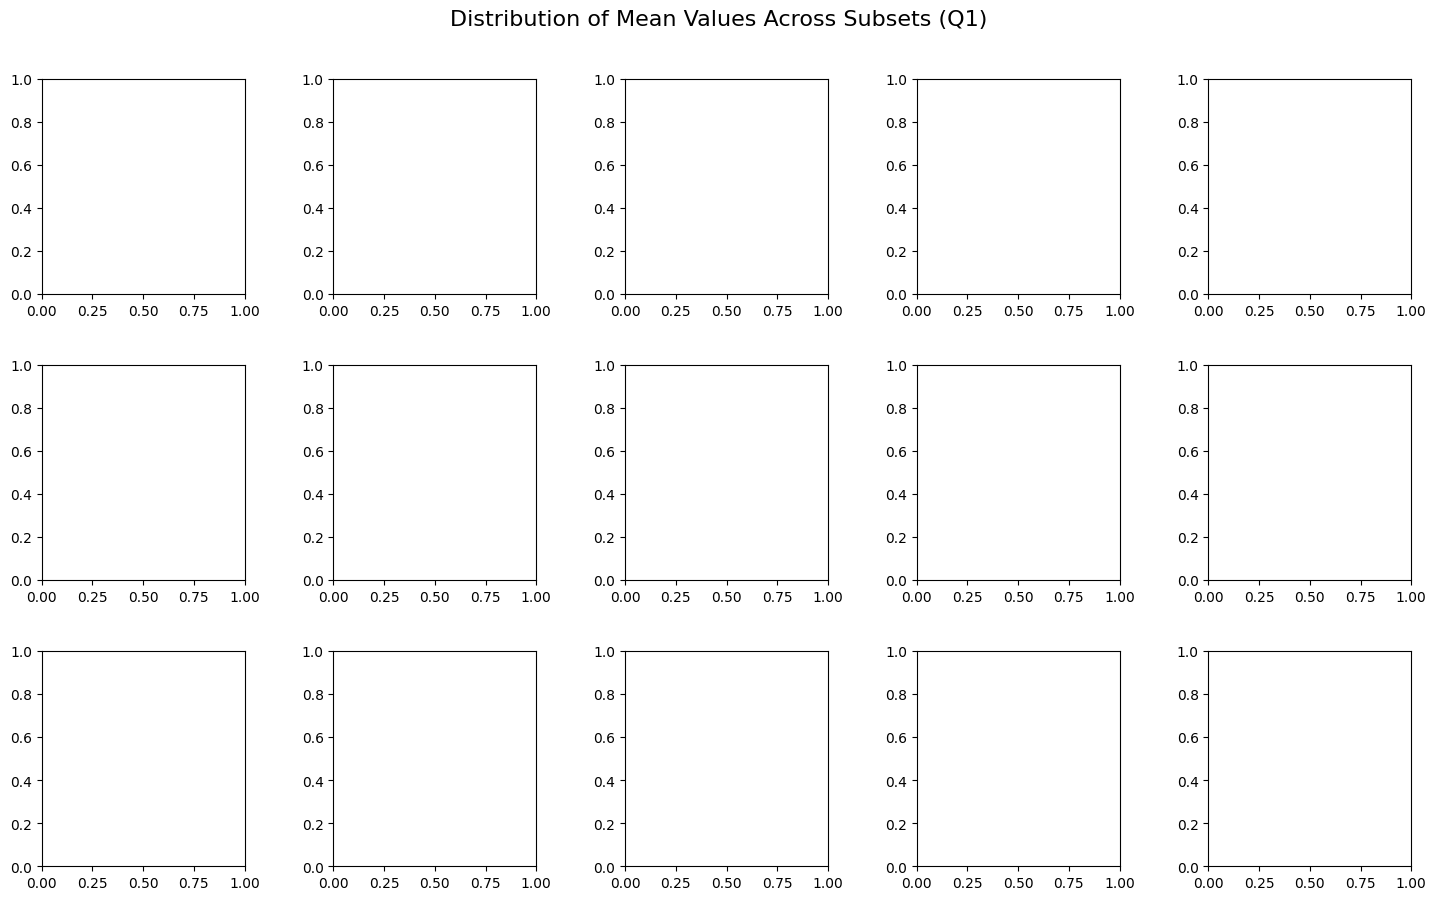

In [40]:
distribution_of_mean_values(calc_micro_indicators)

#### Distribution of Measurement for each Micro-Indicator (without filling in NAs with row mode)

In [ ]:
distribution_of_mean_values(indicators_mean_subsets_nan)